In [41]:
# initial setup
try:
    # settings colab:
    import google.colab
    
    # si usan colab, deben cambiar el token de esta url
    #! mkdir -p ../data
    # los que usan colab deben modificar el token de esta url:
    #! wget -O ../data/properati_2017.csv https://raw.githubusercontent.com/Digital-House-DATA/ds_blend_students_2020/master/M2/CLASE_07_Pandas_2/Data/resultado-de-encuestas-2017-2018.csv?token=AA4GFHO3EKGWGILBCV4BISC6WR6B4
    
except ModuleNotFoundError:    
    # settings local:
    %run "common/base_setup.py"

Running command `conda list`... ok
pandas=1.0.3 already installed
matplotlib=2.2.2 already installed
bokeh=2.0.0 already installed
seaborn=0.10.0 already installed
ipywidgets=7.5.1 already installed
pytest=5.3.4 already installed
chardet=3.0.4 already installed
plotly=4.6.0 already installed
Running command `conda install --yes chart-studio=1.1.0`... error
    
PackagesNotFoundError: The following packages are not available from current channels:

  - chart-studio=1.1.0

Current channels:

  - https://repo.anaconda.com/pkgs/main/linux-64
  - https://repo.anaconda.com/pkgs/main/noarch
  - https://repo.anaconda.com/pkgs/r/linux-64
  - https://repo.anaconda.com/pkgs/r/noarch

To search for alternate channels that may provide the conda package you're
looking for, navigate to

    https://anaconda.org

and use the search bar at the top of the page.





In [61]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
plt.rcParams['figure.figsize'] = (10.0, 8.0)
import seaborn as sns
import re

In [52]:
# low_memorybool, default True
# Internally process the file in chunks, resulting in lower memory use while parsing, 
# but possibly mixed type inference. To ensure no mixed types either set False, 
# or specify the type with the dtype parameter. 
# Note that the entire file is read into a single DataFrame regardless, 
# use the chunksize or iterator parameter to return the data in chunks. (Only valid with C parser).
data = pd.read_csv("./data/properati_2017.csv", sep = ",", low_memory=False)

data.shape

(121220, 26)

Podemos ver que el dataset tiene 121220 filas y 26 variables.

A continuación, una pequeña muestra del dataset

In [53]:
data.head()

,Unnamed: 0,operation,property_type,place_name,place_with_parent_names,country_name,state_name,geonames_id,lat-lon,lat,...,surface_covered_in_m2,price_usd_per_m2,price_per_m2,floor,rooms,expenses,properati_url,description,title,image_thumbnail
0,0,sell,PH,Mataderos,|Argentina|Capital Federal|Mataderos|,Argentina,Capital Federal,3430787.0,"-34.6618237,-58.5088387",-34.661824,...,40.0,1127.272727,1550.000000,NaN,NaN,NaN,http://www.properati.com.ar/15bo8_venta_ph_mat...,"2 AMBIENTES TIPO CASA PLANTA BAJA POR PASILLO,...",2 AMB TIPO CASA SIN EXPENSAS EN PB,https://thumbs4.properati.com/8/BluUYiHJLhgIIK...
1,1,sell,apartment,La Plata,|Argentina|Bs.As. G.B.A. Zona Sur|La Plata|,Argentina,Bs.As. G.B.A. Zona Sur,3432039.0,"-34.9038831,-57.9643295",-34.903883,...,NaN,NaN,NaN,NaN,NaN,NaN,http://www.properati.com.ar/15bob_venta_depart...,Venta de departamento en décimo piso al frente...,VENTA Depto 2 dorm. a estrenar 7 e/ 36 y 37 ...,https://thumbs4.properati.com/7/ikpVBu2ztHA7jv...
2,2,sell,apartment,Mataderos,|Argentina|Capital Federal|Mataderos|,Argentina,Capital Federal,3430787.0,"-34.6522615,-58.5229825",-34.652262,...,55.0,1309.090909,1309.090909,NaN,NaN,NaN,http://www.properati.com.ar/15bod_venta_depart...,2 AMBIENTES 3ER PISO LATERAL LIVING COMEDOR AM...,2 AMB 3ER PISO CON ASCENSOR APTO CREDITO,https://thumbs4.properati.com/5/SXKr34F_IwG3W_...
3,3,sell,PH,Liniers,|Argentina|Capital Federal|Liniers|,Argentina,Capital Federal,3431333.0,"-34.6477969,-58.5164244",-34.647797,...,NaN,NaN,NaN,NaN,NaN,NaN,http://www.properati.com.ar/15boh_venta_ph_lin...,PH 3 ambientes con patio. Hay 3 deptos en lote...,PH 3 amb. cfte. reciclado,https://thumbs4.properati.com/3/DgIfX-85Mog5SP...
4,4,sell,apartment,Centro,|Argentina|Buenos Aires Costa Atlántica|Mar de...,Argentina,Buenos Aires Costa Atlántica,3435548.0,"-38.0026256,-57.5494468",-38.002626,...,35.0,1828.571429,1828.571429,NaN,NaN,NaN,http://www.properati.com.ar/15bok_venta_depart...,DEPARTAMENTO CON FANTÁSTICA ILUMINACIÓN NATURA...,DEPTO 2 AMB AL CONTRAFRENTE ZONA CENTRO/PLAZA ...,https://thumbs4.properati.com/5/xrRqlNcSI_vs-f...


## Analisis preliminar del Dataset

### Columnas

In [54]:
data.columns

Index(['Unnamed: 0', 'operation', 'property_type', 'place_name',
       'place_with_parent_names', 'country_name', 'state_name', 'geonames_id',
       'lat-lon', 'lat', 'lon', 'price', 'currency',
       'price_aprox_local_currency', 'price_aprox_usd', 'surface_total_in_m2',
       'surface_covered_in_m2', 'price_usd_per_m2', 'price_per_m2', 'floor',
       'rooms', 'expenses', 'properati_url', 'description', 'title',
       'image_thumbnail'],
      dtype='object')

### Información de Tipos 

In [55]:
data.dtypes

Unnamed: 0                      int64
operation                      object
property_type                  object
place_name                     object
place_with_parent_names        object
country_name                   object
state_name                     object
geonames_id                   float64
lat-lon                        object
lat                           float64
lon                           float64
price                         float64
currency                       object
price_aprox_local_currency    float64
price_aprox_usd               float64
surface_total_in_m2           float64
surface_covered_in_m2         float64
price_usd_per_m2              float64
price_per_m2                  float64
floor                         float64
rooms                         float64
expenses                      float64
properati_url                  object
description                    object
title                          object
image_thumbnail                object
dtype: objec

En principio, decidimos eliminar ciertas columnas que a priori sabemos no vamos a utilizar.

In [56]:
data.drop(['expenses', 'lat-lon', 'image_thumbnail', 'properati_url'], axis=1, inplace=True)

Realizamos algunas normalizaciones generales:

In [57]:
regex = re.compile(r'\s+')
fformat = lambda x: regex.sub(' ', str(x)).strip().lower()
data['description'] = data['description'].apply(fformat)
data['title']       = data['title'].apply(fformat)

Y a continuación, borramos filas que identicamos no son reales.

In [58]:
data = data[~data['description'].str.contains('edificio: gala x', regex=False)]
data = data[~data['title'].str.contains('111.111 -', regex=False)]

## Visualización de NA

Primero mostramos una distribución de frecuencias:

In [60]:
def freq_na(df, zeros=False):
    miss      = df.isnull().sum(axis=0)
    miss_prop = miss / len(df)
    freq = pd.concat([miss, miss_prop], axis=1)
    freq.columns = ['total', 'proporcion']
    return freq if zeros else freq[freq['total'] > 0]
freq_na(data)

,total,proporcion
place_name,23,0.000190
geonames_id,18717,0.154435
lat,51529,0.425167
lon,51529,0.425167
price,20407,0.168379
currency,20408,0.168387
price_aprox_local_currency,20407,0.168379
price_aprox_usd,20407,0.168379
surface_total_in_m2,39328,0.324496
surface_covered_in_m2,19907,0.164253


Y a continuación, una gráfica de barras:

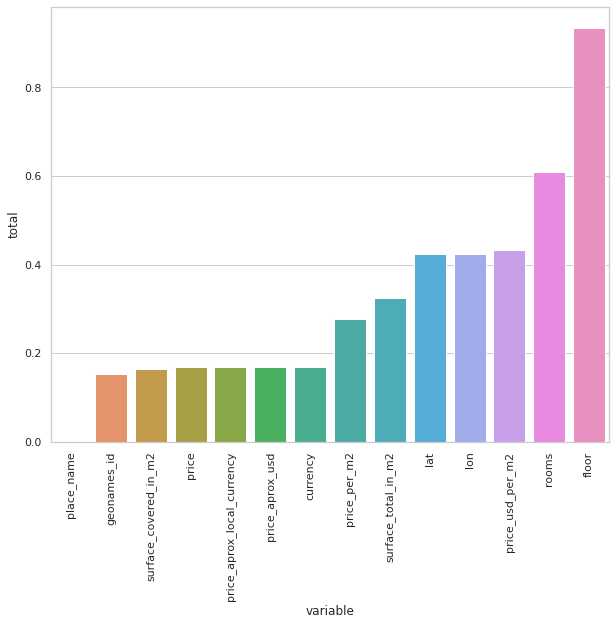

In [62]:
def show_na(df):
    # proporcion de valores NA + orden
    miss = df.isnull().sum() / len(df)
    miss = miss[miss > 0]
    miss.sort_values(inplace=True)
    # dataset
    miss = miss.to_frame()
    miss.columns = ['total']
    miss.index.names = ['variable']
    miss['variable'] = miss.index
    # plot
    sns.set(style="whitegrid", color_codes=True)
    sns.barplot(x='variable', y='total', data=miss)
    plt.xticks(rotation = 90)
    plt.show()
show_na(data)

In [63]:
data.to_csv('./data/properati-fase0.csv', sep=',', index=False)